# Example using simple models

In [ ]:
import numpy as np
from scipy.stats import norm, uniform, lognorm, multivariate_normal
import sys
sys.path.insert(0, '..')
from iis import Model, IIS

#
# Define model's functional form
#
def modelAH2007(params, k=1):
    """ Simple model from Annan and Hargreave, 2007

    y = 10*(x/10)**k
    
    where x is the single model parameter
    and k an exponent to obtains linear or non-linear models (default to 1)
    """
    return [10*(params[0]/10)**k]

#
# Define proposal and likelihood's distributions
#
likelihood = norm(loc=10, scale=3)  # observations
proposal = uniform(loc=0, scale=100)  # initial distribution for parameters
prior = None   # prior knowledge on parameters, to be multiplied with likelihood

#
# Initialize the model to be estimated
#
model = Model(modelAH2007, likelihood, proposal, prior) 

#
# Use IIS iterative solver class to estimate posterior distributions
#
iis = IIS(model)
ensemble = iis.estimate(size=500, resampling_method='residual', maxiter=60)  # proceed to estimation

In [ ]:
#
# Plot diagnostic on the estimated model
#
%matplotlib inline
#import matplotlib.pyplot as plt
from iis.diagnostic import Diagnostic, plot_distribution
diag = Diagnostic(iis.history)
diag.plot_series_state()
#diag.plot_distribution()
plot_distribution(iis.history[-1])
lines = diag.plot_traceback()
#diag.plot_series_analysis()

In [1]:
def mymodel(params):
    """User-defined model with two parameters

    Parameters
    ----------
    params : numpy.ndarray 1-D

    Returns
    -------
    state : float
        return value (could also be an array)
    """
    return params[0] + params[1]*2

from scipy.stats import norm, uniform
likelihood = norm(loc=1, scale=1)  # normal, univariate distribution mean 1, s.d. 1
prior = [norm(loc=0, scale=10), uniform(loc=-10, scale=20)] 

from iis import IIS, Model
model = Model(mymodel, likelihood, prior=prior)  # define the model 
solver = IIS(model)
ensemble = solver.estimate(size=500, maxiter=50)

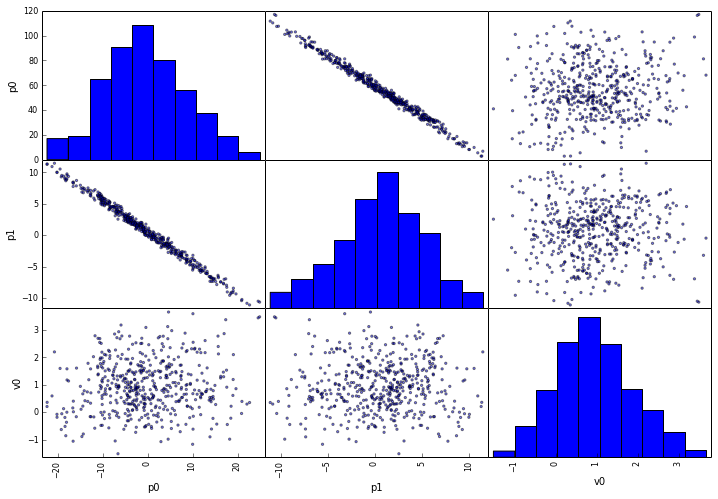

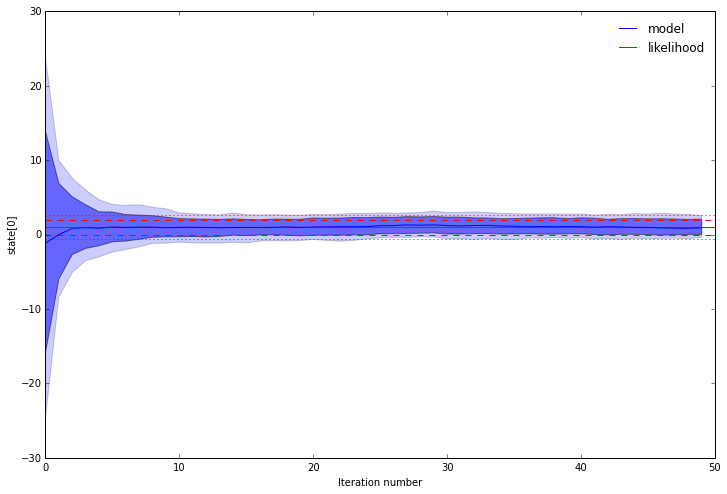

In [59]:
%matplotlib inline
import iis.diagnostic as dd; reload(dd)
from iis.diagnostic import Diagnostic, scatter_matrix

# posterior distribution for model state
#ensemble = solver.history[-1]
#plot_distribution(ensemble, field='state') 
# posterior distribution for model params
#plot_distribution(ensemble, field='params', dim=0) 
#plot_distribution(ensemble, field='params', dim=1)
scatter_matrix(ensemble)
# also check convergence history
diag = Diagnostic(solver.history)
diag.plot_series_state()

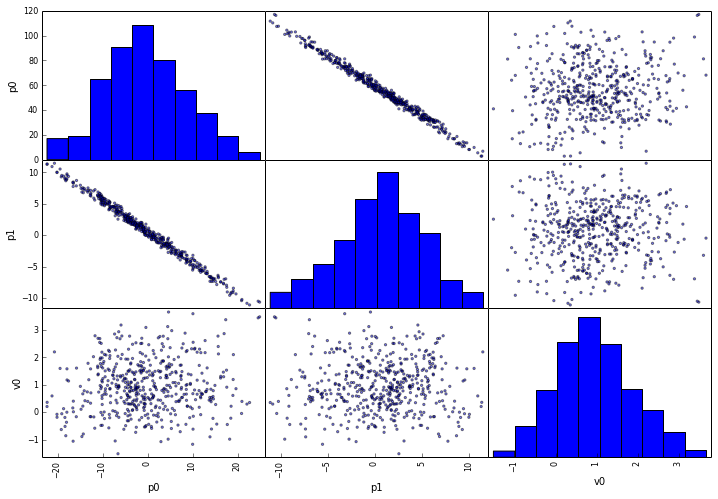

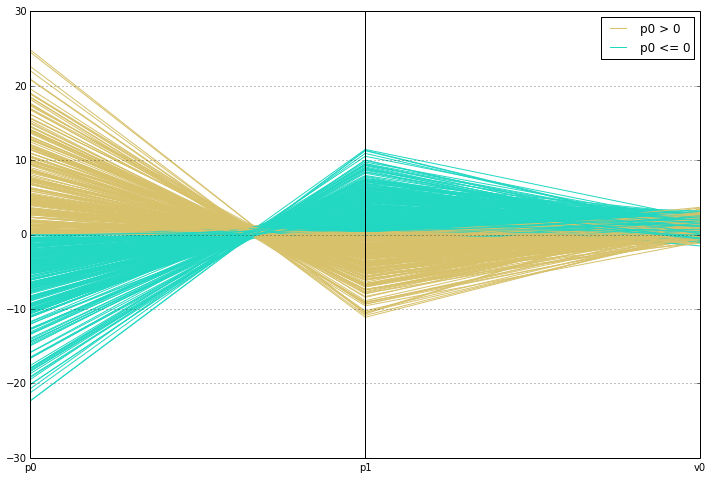

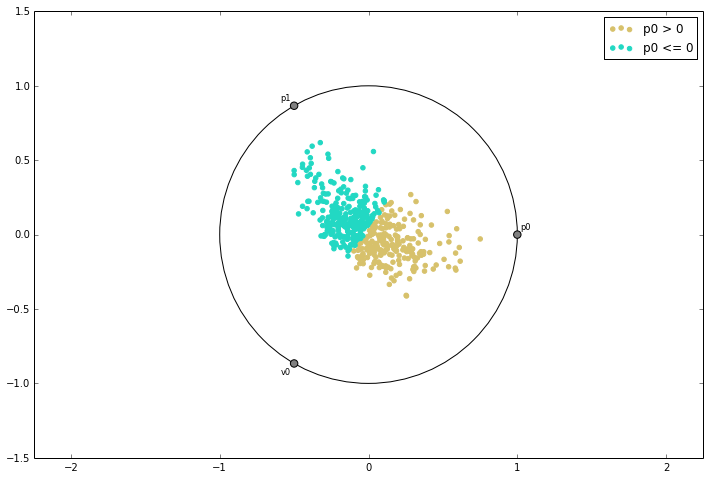

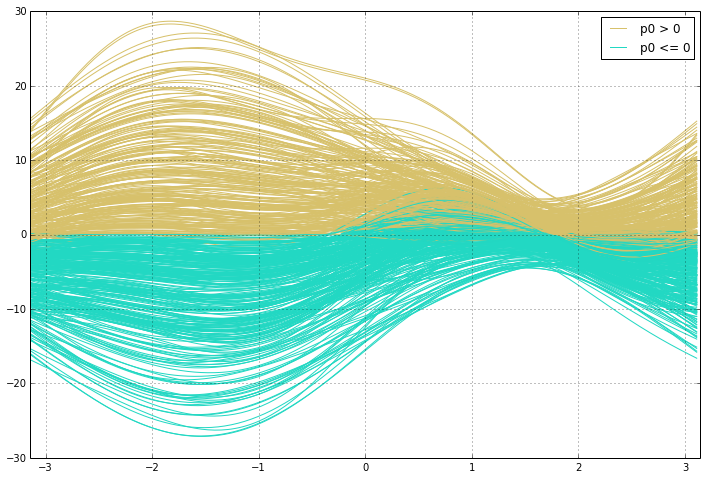

In [75]:
%matplotlib inline
#%matplotlib
import matplotlib.pyplot as plt
import iis.diagnostic as dd; reload(dd)
from iis.diagnostic import Diagnostic, plot_distribution, scatter_matrix, radviz, parallel_coordinates, andrews_curves

scatter_matrix(ensemble)

categories = []
for i in xrange(ensemble.size):
    categories.append('p0 > 0' if ensemble.params[i,0]>0 else 'p0 <= 0')

plt.figure()
parallel_coordinates(ensemble, categories)
plt.figure()
radviz(ensemble, categories)
plt.figure()
andrews_curves(ensemble, categories)